In [11]:
#independent (Independent)
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
df = pd.read_csv('dataset_malwares.csv');

In [2]:
#independent (Constant )

benign = df[df['Malware'] == 0]
malicious = df[df['Malware'] == 1]
# Oversample benign instances
benign_oversampled = resample(benign,replace=True,n_samples=len(malicious),random_state=42) 

# Combine oversampled benign with original malicious
df_oversampled = pd.concat([benign_oversampled, malicious])
class_distribution = df_oversampled['Malware'].value_counts()
#print("Class Distribution:\n", class_distribution) OUTPUTS 14599 for both classes
used_features = df_oversampled.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(used_features , df_oversampled['Malware'] , test_size=0.20, random_state=42);


In [14]:
from sklearn.ensemble import RandomForestClassifier
#Base line is 100 trees , the more trees the better performance
rf = RandomForestClassifier(n_estimators=100, random_state=17);
rf.fit(X_train, y_train);

Accuracy: 99.62%
              precision    recall  f1-score   support

      Benign       0.99      1.00      1.00      2932
     Malware       1.00      0.99      1.00      2908

    accuracy                           1.00      5840
   macro avg       1.00      1.00      1.00      5840
weighted avg       1.00      1.00      1.00      5840

Misclassified samples: 22


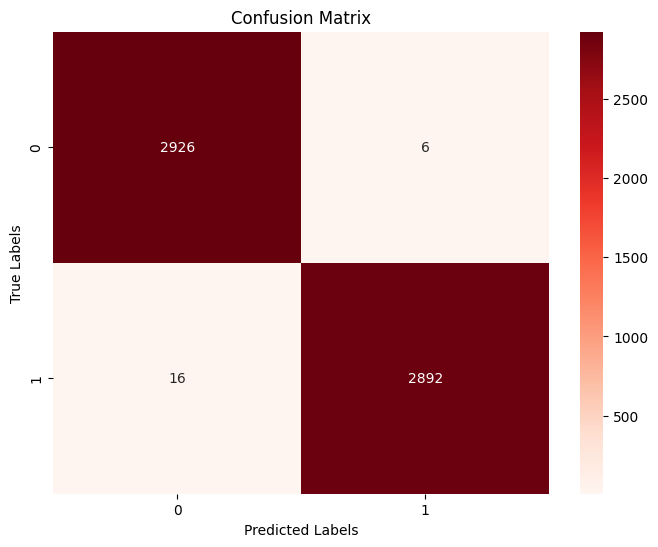

In [13]:
from sklearn.metrics import accuracy_score, classification_report;
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

misclassified = np.where(y_test != y_pred)[0]
print(f"Misclassified samples: {len(misclassified)}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [5]:
#increase number of trees 
rf = RandomForestClassifier(n_estimators=300, random_state=17);
rf.fit(X_train, y_train);

Accuracy: 99.62%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2932
           1       1.00      0.99      1.00      2908

    accuracy                           1.00      5840
   macro avg       1.00      1.00      1.00      5840
weighted avg       1.00      1.00      1.00      5840

[[2926    6]
 [  16 2892]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2932
           1       1.00      0.99      1.00      2908

    accuracy                           1.00      5840
   macro avg       1.00      1.00      1.00      5840
weighted avg       1.00      1.00      1.00      5840



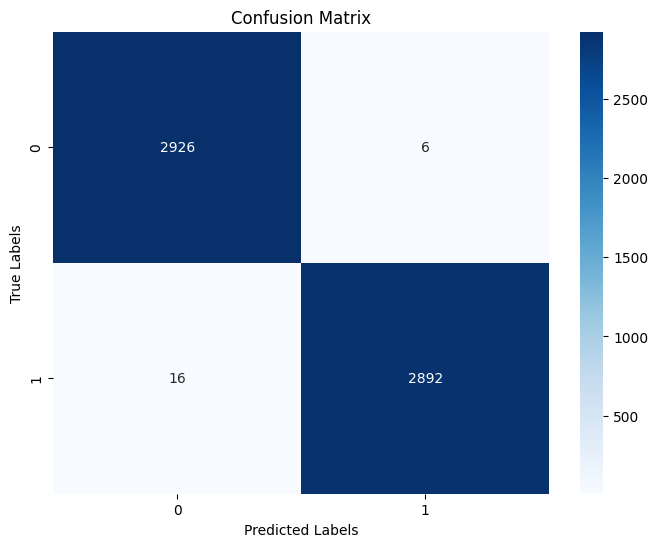

In [6]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(y_test, y_pred));
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Print detailed classification report
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [15]:
#K-Fold Cross validation
from sklearn.model_selection import cross_val_score
X = df.drop(['Malware','Name'],axis = 1) 
y = df['Malware']
k  = 9 #Folds
scores = cross_val_score(rf, X, y, cv=k, scoring='accuracy')

print("Cross-Validation Scores for each fold:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores for each fold: [0.98990363 0.99449289 0.99541074 0.99173933 0.99403396 0.9912804
 0.98806792 0.99357503 0.99082148]
Mean Accuracy: 0.9921472642904491
Standard Deviation: 0.0022632544002011497


In [8]:
for n in range(2,11):
    print( f'19611/{n} : {19611/n}')

19611/2 : 9805.5
19611/3 : 6537.0
19611/4 : 4902.75
19611/5 : 3922.2
19611/6 : 3268.5
19611/7 : 2801.5714285714284
19611/8 : 2451.375
19611/9 : 2179.0
19611/10 : 1961.1


In [ ]:
# Run computational Test
!pip install memory-profiler

In [ ]:
import time #To measure the training and inference time
import psutil # To monitor memory usage.
from memory_profiler import memory_usage #For detailed memory profiling

import matplotlib.pyplot as plt


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report;

def run_model():
    # Measure memory usage
    mem_before = psutil.virtual_memory().used / (1024 ** 2)  # Memory in MB

    # Start time for training
    start_train_time = time.time()
    model = RandomForestClassifier(n_estimators=100, random_state=17);
    model.fit(X_train, y_train);
    end_train_time = time.time()

    # Time to make predictions
    start_pred_time = time.time()
    y_pred = model.predict(X_test)
    end_pred_time = time.time()

    # Memory after model training and inference
    mem_after = psutil.virtual_memory().used / (1024 ** 2)  # Memory in MB

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    train_time = end_train_time - start_train_time
    inference_time = end_pred_time - start_pred_time
    memory_consumption = mem_after - mem_before

    # Display results
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"Memory Consumption: {memory_consumption:.2f} MB")

# Profile the model
memory_profile = memory_usage(run_model, interval=0.1, timeout=None)

# Plot memory usage over time
import matplotlib.pyplot as plt
plt.plot(memory_profile)
plt.title("Memory Usage Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Memory Usage (MB)")
plt.show()
